## Setup

Run this cell as it is to setup your environment.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as scipy
import scipy.stats as sps

## Two-sample problem

<img src="./Figure_8.3.png">

In [2]:
treatment_data = {'age':[94, 197, 16, 38, 99, 141, 23]};
mice_treatment = pd.DataFrame(treatment_data)
control_data = {'age':[52, 104, 146, 10, 51, 30, 40, 27, 46]};
mice_control = pd.DataFrame(control_data)

In [3]:
mice_sigma = np.mean(mice_treatment.age)-np.mean(mice_control.age)
mice_sigma

30.63492063492064

In [4]:
b=1400;
n=7;
m=9;
treat_bs_set = np.zeros((b,n))
control_bs_set = np.zeros((b,m))
bs_index_n = np.random.randint(n,size=(b,n))
bs_index_m = np.random.randint(m,size=(b,m))
treat_rep_mean = np.zeros(b)
control_rep_mean = np.zeros(b)
rep_sigma = np.zeros(b)

for i in np.arange(0,b,1):
    for j in np.arange(0,n,1):
        treat_bs_set[i,j] = mice_treatment.age[mice_treatment.index==bs_index_n[i,j]]
    for k in np.arange(0,m,1):
        control_bs_set[i,k] = mice_control.age[mice_control.index==bs_index_m[i,k]]
    
    treat_rep_mean[i] = np.mean(treat_bs_set[i,:])
    control_rep_mean[i] = np.mean(control_bs_set[i,:])
    rep_sigma[i] = treat_rep_mean[i]-control_rep_mean[i]


se_sigma = np.std(rep_sigma,ddof=1)
se_sigma

26.87237515970179

## More general data structures (including time series!)

### Import data

In [5]:
hormone=pd.read_csv('table8.1_hormone.csv')
hormone.head()

,time,level
0,1,2.4
1,2,2.4
2,3,2.4
3,4,2.2
4,5,2.1


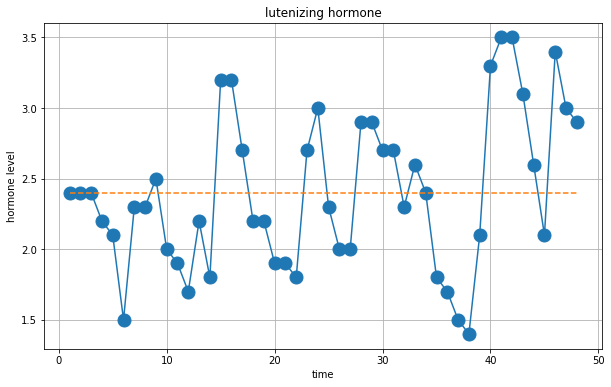

In [6]:
#Plot hormone data
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hormone.time,hormone.level,'-o',markersize=13)
ax.plot(hormone.time,np.ones(48)*np.mean(hormone.level),'--')
ax.set(xlabel='time', ylabel='hormone level',
       title='lutenizing hormone')
ax.grid()

### First order autoregressive scheme

In [7]:
zt = hormone.level.values - np.mean(hormone.level.values)

array([0.586])

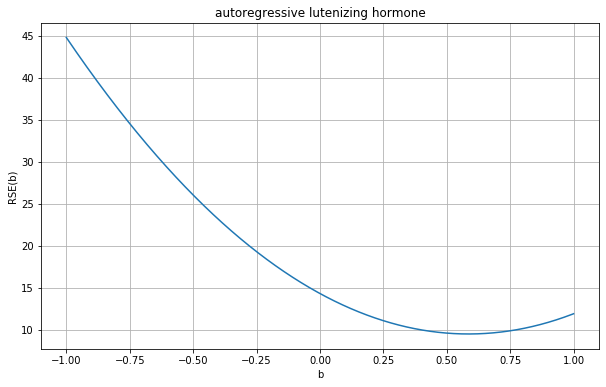

In [8]:
b=np.arange(-1,1.001,0.001)
RSE_b = np.zeros(len(b))
for i in np.arange(0,len(b),1):
    RSE_b[i] = np.sum((zt[1:]-b[i]*zt[:-1])**2)
    
    
#Plot hormone data
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(b,RSE_b)
ax.set(xlabel='b', ylabel='RSE(b)',
       title='autoregressive lutenizing hormone')
ax.grid()

beta = b[RSE_b==np.min(RSE_b)]
beta

In [9]:
eps=zt[1:]-beta*zt[:-1]

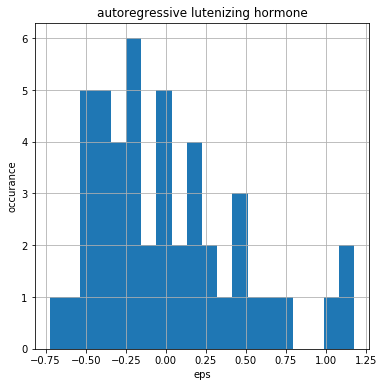

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(eps,bins=20);
ax.set(xlabel='eps', ylabel='occurance',
       title='autoregressive lutenizing hormone')
ax.grid()

In [11]:
np.mean(eps)

0.006234042553191556

In [12]:
np.std(eps)

0.4490492847313091

In [13]:
eps=eps-np.mean(eps)
eps_list={'fluct':eps}

eps=pd.DataFrame(eps_list)

In [14]:
bs=200;
n=47;
bs_eps = np.zeros((bs,n))
bs_index = np.random.randint(n,size=(bs,n))
bs_zt = np.zeros((bs,n))
bs_rep_eps_mean = np.zeros(bs)
bs_rep_beta = np.zeros(bs)

b=np.arange(-1,1.001,0.001)
RSE_b = np.zeros((bs,len(b)))

for i in np.arange(0,bs,1):
    for j in np.arange(1,n,1):
        bs_eps[i,j] = eps.fluct.values[eps.index==bs_index[i,j]]
        bs_zt[i,j] = beta*bs_zt[i,j-1]+bs_eps[i,j]
                 
    for k in np.arange(0,len(b),1):    
        RSE_b[i,k] = np.sum((bs_zt[i,1:]-b[k]*bs_zt[i,:-1])**2)
    
    bs_rep_beta[i] = b[RSE_b[i,:]==np.min(RSE_b[i,:])]


se_beta = np.std(bs_rep_beta,ddof=1)
se_beta

0.1303910793261534

In [15]:
np.mean(bs_rep_beta)

0.5568400000000014

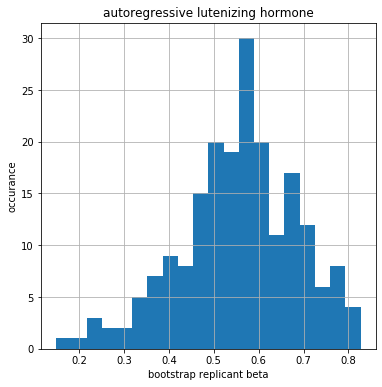

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(bs_rep_beta,bins=20);
ax.set(xlabel='bootstrap replicant beta', ylabel='occurance',
       title='autoregressive lutenizing hormone')
ax.grid()

### Moving block bootstrap

<img src="./Figure_8.9.png">

In [37]:
l_block = 3
num_samples = len(hormone.level.values)
num_blocks = num_samples-l_block+1
blocks = np.zeros((num_blocks,l_block))
for i in np.arange(0,num_blocks,1):
    blocks[i,:] = hormone.level.values[i:i+3]
block_df=pd.DataFrame(blocks,columns=['a','b','c'])
print(hormone.level.values)
block_df

[2.4 2.4 2.4 2.2 2.1 1.5 2.3 2.3 2.5 2.  1.9 1.7 2.2 1.8 3.2 3.2 2.7 2.2
 2.2 1.9 1.9 1.8 2.7 3.  2.3 2.  2.  2.9 2.9 2.7 2.7 2.3 2.6 2.4 1.8 1.7
 1.5 1.4 2.1 3.3 3.5 3.5 3.1 2.6 2.1 3.4 3.  2.9]


,a,b,c
0,2.4,2.4,2.4
1,2.4,2.4,2.2
2,2.4,2.2,2.1
3,2.2,2.1,1.5
4,2.1,1.5,2.3
5,1.5,2.3,2.3
6,2.3,2.3,2.5
7,2.3,2.5,2.0
8,2.5,2.0,1.9
9,2.0,1.9,1.7


In [67]:
bs=200;
k_blocks = int(num_samples/l_block)
bs_hormone = np.zeros((bs,num_samples))
bs_index = np.random.randint(46,size=(bs,k_blocks))
bs_blocks = np.zeros((bs,num_samples))
bs_zt = np.zeros((bs,num_samples))

b=np.arange(-1,1.001,0.001)
RSE_b = np.zeros((bs,len(b)))
bs_beta = np.zeros(bs)

for i in np.arange(0,bs,1):
    for j in np.arange(0,k_blocks,1):
        bs_hormone[i,l_block*j] =  block_df.a.values[block_df.index==bs_index[i,j]]
        bs_hormone[i,l_block*j+1] =  block_df.b.values[block_df.index==bs_index[i,j]]
        bs_hormone[i,l_block*j+2] =  block_df.c.values[block_df.index==bs_index[i,j]]
        bs_zt[i,:] = bs_hormone[i,:]-np.mean(bs_hormone[i,:])
        

    for k in np.arange(0,len(b),1):
        RSE_b[i,k] = np.sum((bs_zt[i,1:]-b[k]*bs_zt[i,:-1])**2)
    
    bs_beta[i] = b[RSE_b[i,:]==np.min(RSE_b[i,:])]



beta_star=np.mean(bs_beta)
beta_star    


0.36612500000000125

In [68]:
se_beta = np.std(bs_beta,ddof=1)
se_beta

0.12890294496676777

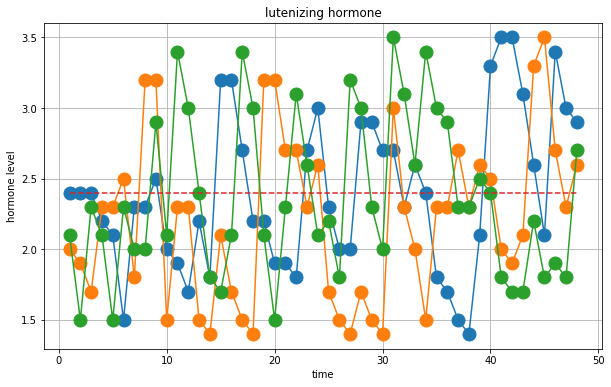

In [55]:
#Plot hormone data
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hormone.time,hormone.level,'-o',markersize=13)
ax.plot(hormone.time,bs_hormone[1,:],'-o',markersize=13)
ax.plot(hormone.time,bs_hormone[2,:],'-o',markersize=13)
ax.plot(hormone.time,np.ones(48)*np.mean(hormone.level),'--')
ax.set(xlabel='time', ylabel='hormone level',
       title='lutenizing hormone')
ax.grid()